## Models for cell temperature

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from pvanalytics import quality
from pvlib import temperature

In [2]:
#readcsv
df = pd.read_csv("df_hourly")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [3]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, module_name):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)

    '''df_temp = pd.DataFrame()
    df_temp["x"] = x
    df_temp["temp_model"] = temp_model
    df_temp["temp_measured"] = temp_measured
    df_temp.set_index("x", inplace=True)

    df_temp = df_temp.asfreq('h')'''
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
    ax1.set_title(f"Model prediction and measured temperature for {module_name}")
    ax1.plot(x, temp_model, label="Estimated module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("[°C]")
    #ax2.set_title("Residuals")
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]")
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend()
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right") 
    plt.tight_layout()
    plt.show()

### PVsyst cell

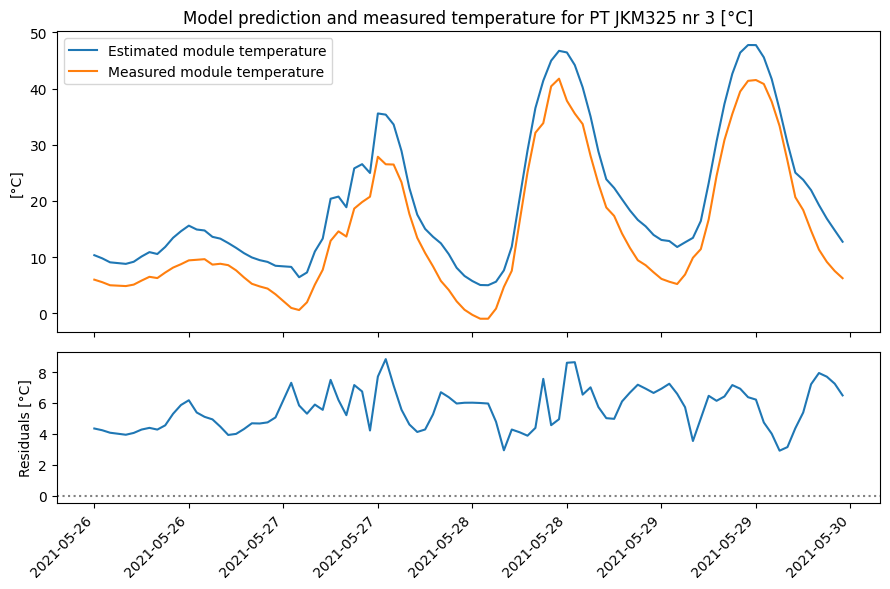

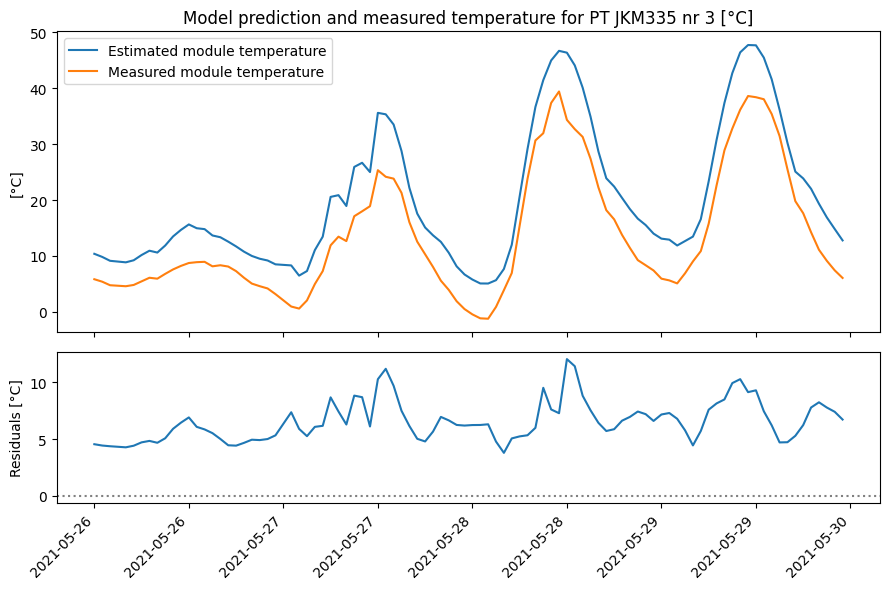

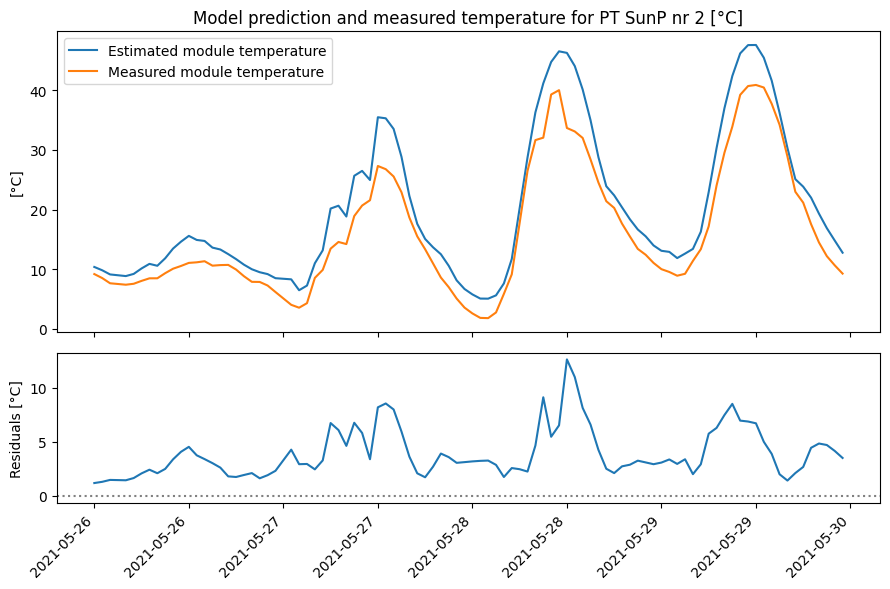

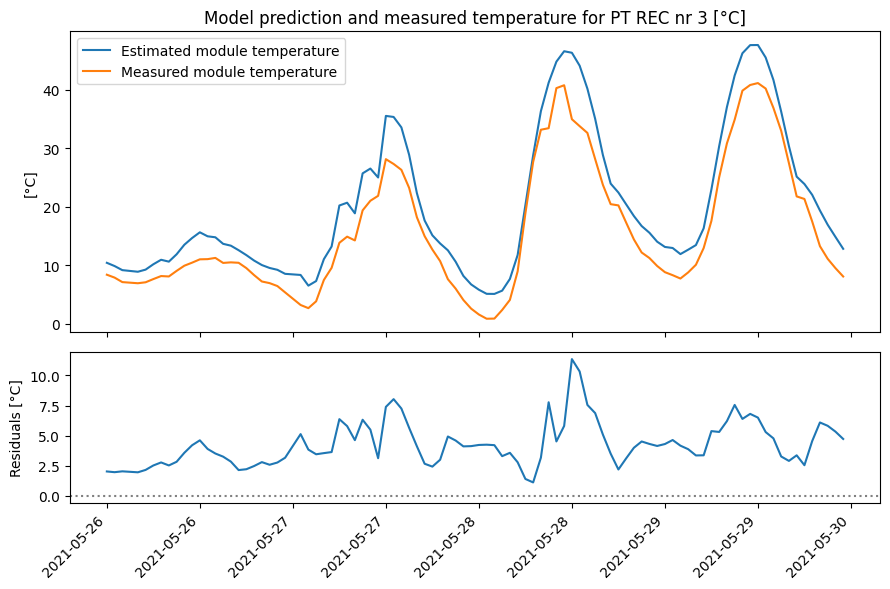

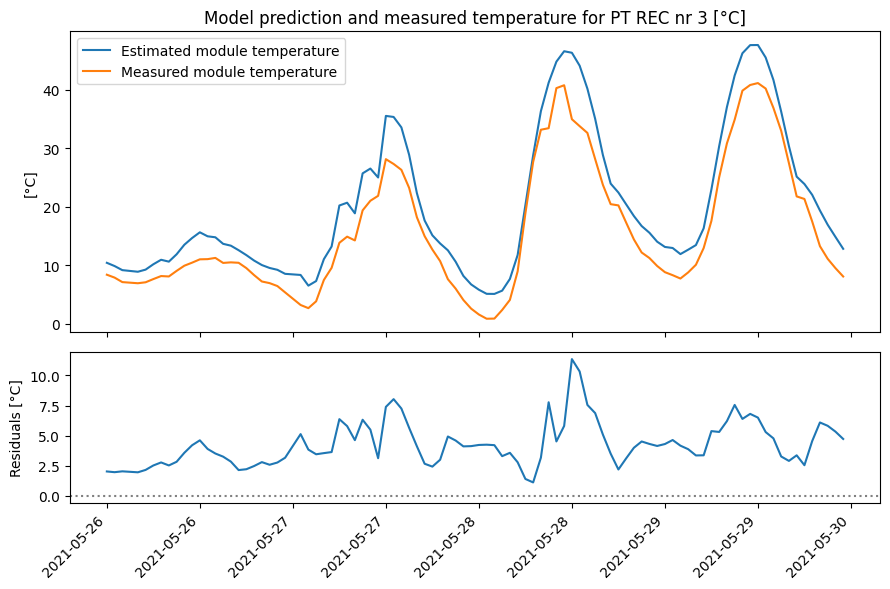

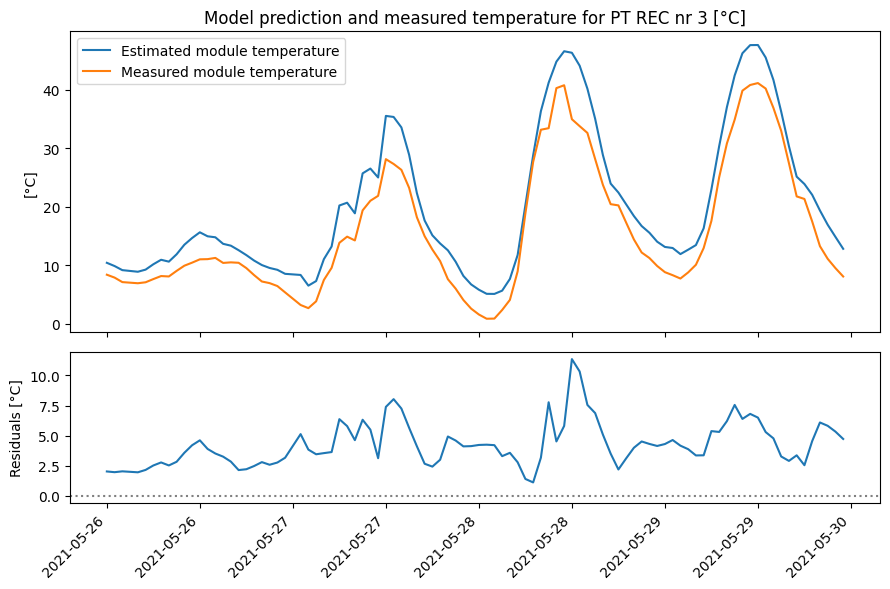

In [4]:
datea = '2021-05-26'
dateb = '2021-05-29'

#JKM325
temp_pvsyst1 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst1.loc[datea:dateb], df["PT JKM325 nr 3 [°C]"].loc[datea:dateb], 'PT JKM325 nr 3 [°C]')
#JKM335
temp_pvsyst2 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst2.loc[datea:dateb], df["PT JKM335 nr 3 [°C]"].loc[datea:dateb], 'PT JKM335 nr 3 [°C]')
#SunP
temp_pvsyst3 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst3.loc[datea:dateb], df['PT SunP nr 2 [°C]'].loc[datea:dateb], 'PT SunP nr 2 [°C]')
#REC Alpha
temp_pvsyst4 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst4.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')
#Talesun
temp_pvsyst5 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst5.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')
#Talesun FrLess
temp_pvsyst6 = temperature.pvsyst_cell(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"])
plot_comparison(df.loc[datea:dateb].index, temp_pvsyst6.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')

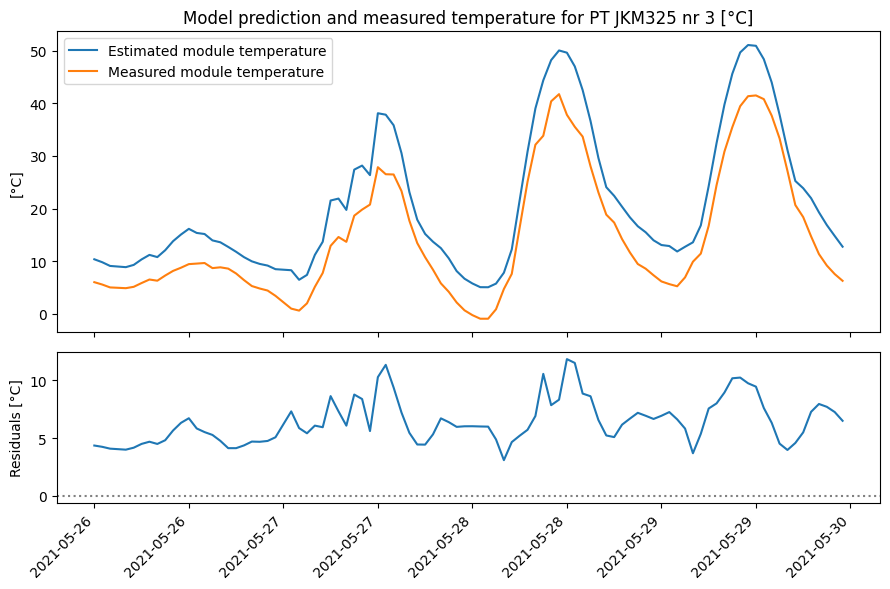

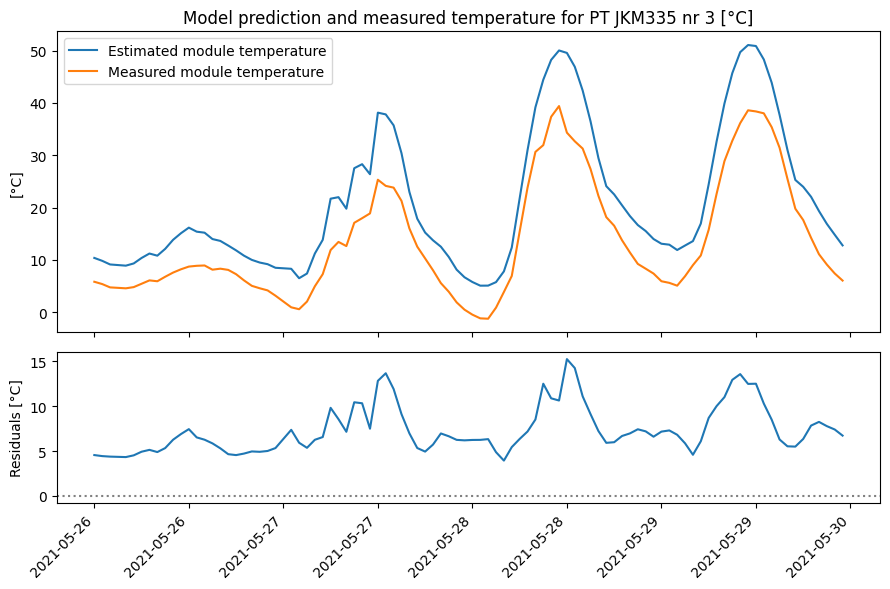

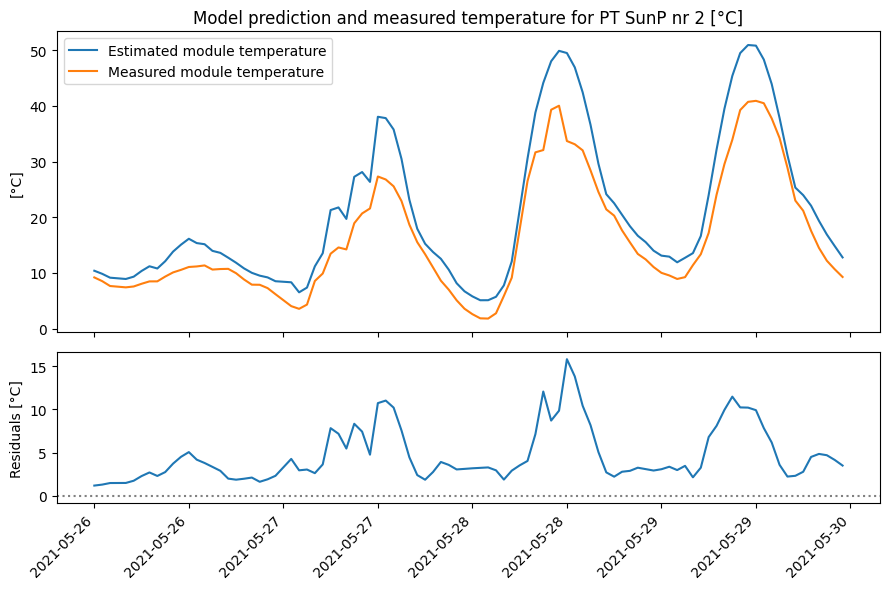

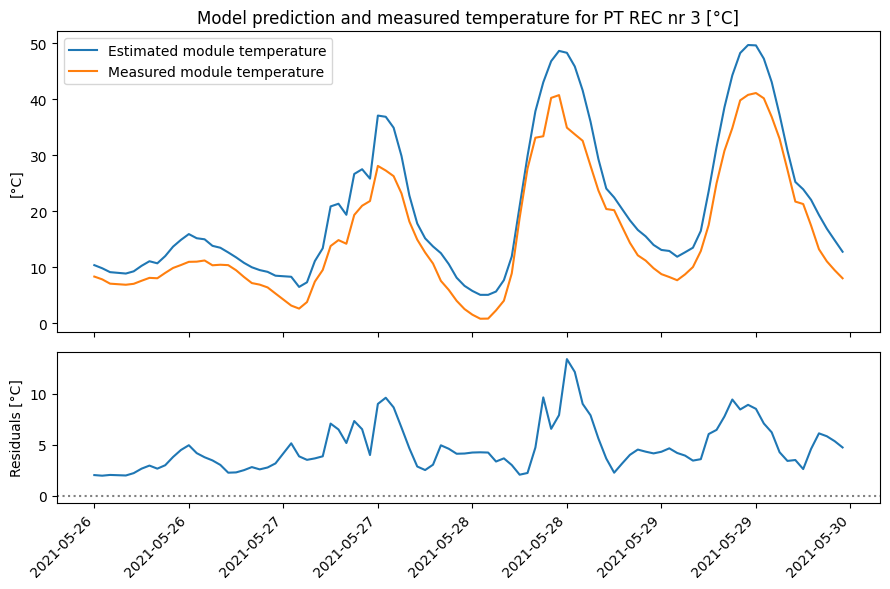

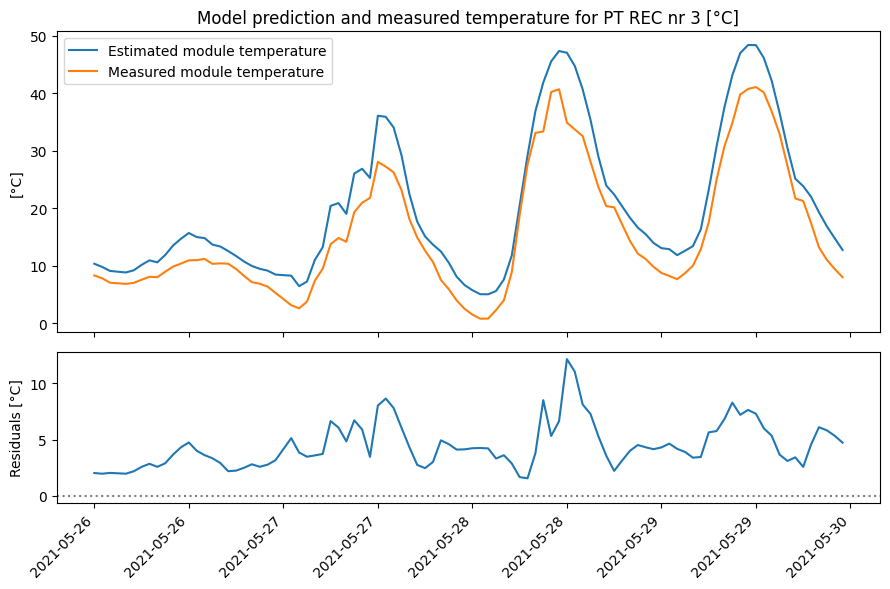

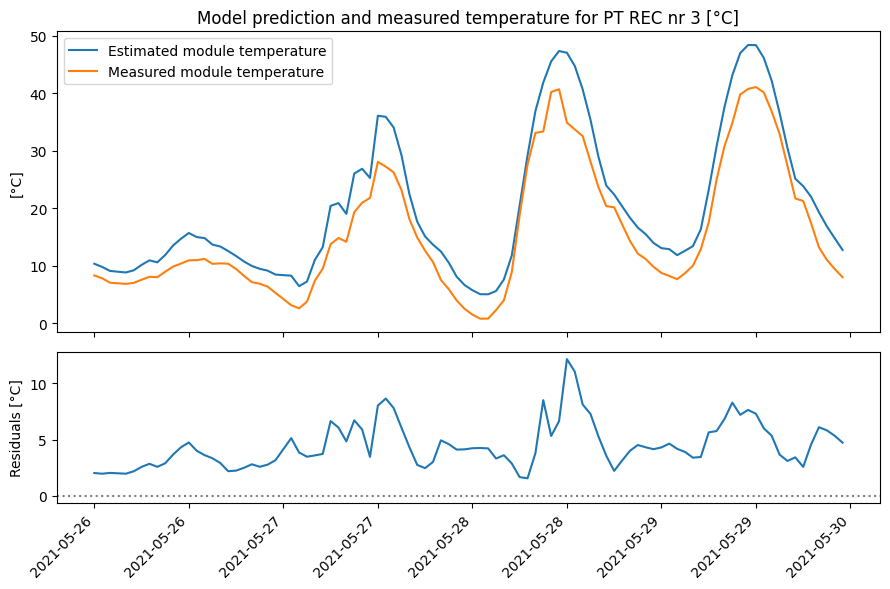

In [5]:
datea = '2021-05-26'
dateb = '2021-05-29'

#JKM325
temp_ross1 = temperature.ross(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
plot_comparison(df.loc[datea:dateb].index, temp_ross1.loc[datea:dateb], df["PT JKM325 nr 3 [°C]"].loc[datea:dateb], 'PT JKM325 nr 3 [°C]')
#JKM335
temp_ross2 = temperature.ross(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
plot_comparison(df.loc[datea:dateb].index, temp_ross2.loc[datea:dateb], df["PT JKM335 nr 3 [°C]"].loc[datea:dateb], 'PT JKM335 nr 3 [°C]')
#SunP
temp_ross3 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=45)
plot_comparison(df.loc[datea:dateb].index, temp_ross3.loc[datea:dateb], df['PT SunP nr 2 [°C]'].loc[datea:dateb], 'PT SunP nr 2 [°C]')
#REC Alpha
temp_ross4 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=44)
plot_comparison(df.loc[datea:dateb].index, temp_ross4.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')
#Talesun
temp_ross5 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=43)
plot_comparison(df.loc[datea:dateb].index, temp_ross5.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')
#Talesun FrLess
temp_ross6 = temperature.ross(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], noct=43)
plot_comparison(df.loc[datea:dateb].index, temp_ross6.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], 'PT REC nr 3 [°C]')

### RMSE

In [6]:
#RMSE
def rmse(model_results, measured_temp):
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    rmse = np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return rmse

In [7]:
RMSE1 = rmse(temp_pvsyst1, df["PT JKM325 nr 3 [°C]"])
RMSE2 = rmse(temp_pvsyst2, df["PT JKM335 nr 3 [°C]"])
RMSE3 = rmse(temp_pvsyst3, df['PT SunP nr 2 [°C]'])
RMSE4 = rmse(temp_pvsyst4, df['PT REC nr 3 [°C]'])
RMSE5 = rmse(temp_pvsyst5, df["PT Talesun FrLess 1 [°C]"])
RMSE6 = rmse(temp_pvsyst6, df["PT Talesun 3 [°C]"])

In [8]:
RMSE1_ross = rmse(temp_ross1, df["PT JKM325 nr 3 [°C]"])
RMSE2_ross = rmse(temp_ross2, df["PT JKM335 nr 3 [°C]"])
RMSE3_ross = rmse(temp_ross3, df['PT SunP nr 2 [°C]'])
RMSE4_ross = rmse(temp_ross4, df['PT REC nr 3 [°C]'])
RMSE5_ross = rmse(temp_ross5, df["PT Talesun FrLess 1 [°C]"])
RMSE6_ross = rmse(temp_ross6, df["PT Talesun 3 [°C]"])

### MBE

In [9]:
def MBE(model_results, measured_temp): 
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    mbe = (1/len(df_temp["model_results"])) * np.sum(df_temp["model_results"] - df_temp["measured_temp"]) #np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return mbe

In [10]:
MBE1 = MBE(temp_pvsyst1, df["PT JKM325 nr 3 [°C]"])
MBE2 = MBE(temp_pvsyst2, df["PT JKM335 nr 3 [°C]"])
MBE3 = MBE(temp_pvsyst3, df['PT SunP nr 2 [°C]'])
MBE4 = MBE(temp_pvsyst4, df['PT REC nr 3 [°C]'])
MBE5 = MBE(temp_pvsyst5, df["PT Talesun FrLess 1 [°C]"])
MBE6 = MBE(temp_pvsyst6, df["PT Talesun 3 [°C]"])

In [11]:
MBE1_ross = MBE(temp_ross1, df["PT JKM325 nr 3 [°C]"])
MBE2_ross = MBE(temp_ross2, df["PT JKM335 nr 3 [°C]"])
MBE3_ross = MBE(temp_ross3, df['PT SunP nr 2 [°C]'])
MBE4_ross = MBE(temp_ross4, df['PT REC nr 3 [°C]'])
MBE5_ross = MBE(temp_ross5, df["PT Talesun FrLess 1 [°C]"])
MBE6_ross = MBE(temp_ross6, df["PT Talesun 3 [°C]"])

#### Saving results

In [12]:
module_names = ["PT JKM325 nr 3", "PT JKM335 nr 3", "PT SunP nr 2", "PT REC nr 3", "PT Talesun FrLess 1",  "PT Talesun 3"]


results_pvsyst = pd.DataFrame({
    "Module": module_names,
    "RMSE": [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6],
    "MBE": [MBE1, MBE2, MBE3, MBE4, RMSE5, RMSE6]
})

In [13]:
results_ross = pd.DataFrame({
    "Module": module_names,
    "RMSE": [RMSE1_ross, RMSE2_ross, RMSE3_ross, RMSE4_ross, RMSE5_ross, RMSE6_ross],
    "MBE": [MBE1_ross, MBE2_ross, MBE3_ross, MBE4_ross, RMSE5_ross, RMSE6_ross]
})

In [14]:
results_pvsyst.to_csv('Pvsyst_results.csv', index=False)

In [15]:
results_ross.to_csv('Ross_results.csv', index=False)